In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

#rescale
X = X / 255.

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()

In [3]:
X_train.shape

(60000, 784)

In [4]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [5]:
n_comp = 30

pca = PCA(n_components=n_comp)

pca.fit(X_train)
#30次元の潜在空間に変換して圧縮
X_train_latent = pca.transform(X_train)

In [6]:
X_train_latent.shape

(60000, 30)

In [7]:
X_train_latent[0]

array([ 0.48601015, -1.22617358, -0.09613354, -2.17944297, -0.10704576,
       -0.9116717 ,  0.91763032,  0.62666454, -1.42554896,  0.77814786,
        0.77449849, -0.99629484, -0.44507478,  2.93844615,  0.85982031,
       -0.0184067 ,  1.2947725 ,  1.21246799,  1.08872613,  0.65229422,
        0.10839279, -0.2520144 , -0.85266152,  0.98376115,  0.17911287,
        0.39745894, -1.20701346,  0.66531731, -0.49431944, -0.4886922 ])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# fit the model
clf = svm.OneClassSVM(nu=0.2, kernel='rbf', gamma=0.1)
clf.fit(X_train_latent)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.2, shrinking=True, tol=0.001, verbose=False)

In [9]:
y_pred_train_latent = clf.predict(X_train_latent)

In [11]:
print(y_pred_train_latent)

[ 1  1  1 ... -1  1  1]


In [10]:
y_pred_train_latent.shape

(60000,)

In [11]:
y_pred_train_latent[0]

-1

In [12]:
extension_2 =[]
for i in range(10):
    if i%2==0:
        extension_2.append(i)
extension_2
#>>> [0, 2, 4, 6, 8]

[0, 2, 4, 6, 8]

In [13]:
kara = []
for i in range(100):
   if y_pred_train_latent[i]==-1:
              kara.append(i)
kara  

[0, 27, 28, 31, 34, 47, 51, 56, 60, 63, 64, 70, 75, 82, 83]

In [14]:
len(kara)

15

In [15]:
kara[0]

0

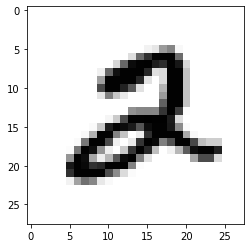

In [16]:
plt.imshow(X[5].reshape(28,28), cmap=plt.cm.gray_r)

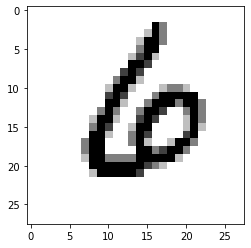

In [17]:
for i in range(len(kara)):
    plt.imshow(X[kara[i]].reshape(28,28), cmap=plt.cm.gray_r)

In [18]:
import numpy as np
import cv2

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
%cd ./gdrive/'My Drive'/"Colab Notebooks"/"extractdouga"

/content/gdrive/My Drive/Colab Notebooks/extractdouga


In [21]:
cv2.imwrite('henkantest.jpg',255**X[kara[0]].reshape(28,28,1))

True

In [22]:
X[kara[0]].reshape(28,28,1)

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [23]:
for i in range(len(kara)):
  cv2.imwrite(f'comb{i:03d}.jpg',255**X[kara[i]].reshape(28,28,1))

In [24]:
#ファイルに問題あり

import sys
import cv2

# encoder(for mp4)
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
# output file name, encoder, fps, size(fit to image size)
video = cv2.VideoWriter('video.mp4',fourcc, 20.0, (1240, 1360))

if not video.isOpened():
    print("can't be opened")
    sys.exit()

for i in range(0,len(kara) ):
    # hoge0000.png, hoge0001.png,..., hoge0090.png
    img = cv2.imread('./comb%03d.jpg' % i)

    # can't read image, escape
    if img is None:
        print("can't read")
        break

    # add
    video.write(img)
    print(i)

video.release()
print('written')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
written


In [25]:
import glob

from PIL import Image

frames = []
images = sorted(glob.glob("./*.jpg"))

print(images)

['./comb000.jpg', './comb001.jpg', './comb002.jpg', './comb003.jpg', './comb004.jpg', './comb005.jpg', './comb006.jpg', './comb007.jpg', './comb008.jpg', './comb009.jpg', './comb010.jpg', './comb011.jpg', './comb012.jpg', './comb013.jpg', './comb014.jpg', './henkantest.jpg']


In [26]:
for image in images:
    new_frame = Image.open(image)
    frames.append(new_frame)

frames[0].save('jpg_to_gif.gif',
               format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=500,
               loop=0)